### <center><font color = #03989e>DATA3001 - Protolytix 🧬</font></center>
<center><center><center><center><center><font color = #03989e>Dharani Palanisamy (z5260276)</font></center>
<center><center><center><center><font color = #03989e>Faiyam Islam (z5258151)</font></center></center></center></center>
<center><center><center><font color = #03989e>Hilary Cao (z5308506)</font></center></center></center>
<center><center><font color = #03989e>Kelly Tao (z5259876)</font></center></center>
<center><font color = #03989e>Pooja Saianand (z5312416)</font></center>

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Importing Packages</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
import os

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Proteins dataset</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [2]:
data = pd.read_csv('AF-O43526-F1-model_v3.tsv', sep='\t', header=0)
data

,index,x,y,z,gamma,exp,obs
0,1,-3.512,-33.674,-14.723,0.766105,0.551831,0
1,2,-1.390,-34.119,-11.579,0.286887,0.548329,0
2,3,1.629,-36.312,-11.147,0.535520,0.621959,2
3,4,4.865,-35.872,-9.157,0.688981,0.579143,1
4,5,7.371,-38.625,-8.349,0.442748,0.575410,0
...,...,...,...,...,...,...,...
867,868,-12.577,-52.381,-22.296,0.353039,0.586997,0
868,869,-10.479,-51.784,-19.900,0.380064,0.597300,0
869,870,-6.981,-50.668,-18.703,0.392629,0.529663,0
870,871,-3.920,-51.828,-16.712,0.431890,0.630496,0


In [3]:
data.head()

,index,x,y,z,gamma,exp,obs
0,1,-3.512,-33.674,-14.723,0.766105,0.551831,0
1,2,-1.390,-34.119,-11.579,0.286887,0.548329,0
2,3,1.629,-36.312,-11.147,0.535520,0.621959,2
3,4,4.865,-35.872,-9.157,0.688981,0.579143,1
4,5,7.371,-38.625,-8.349,0.442748,0.575410,0


In [4]:
data.describe()

,index,x,y,z,gamma,exp,obs
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,12.766525,9.374657,-18.326908,0.516791,0.560077,0.291284
std,251.869014,30.937491,24.066195,28.499735,0.282806,0.054157,0.546373
min,1.000000,-44.803000,-52.381000,-96.751000,0.009671,0.385233,0.000000
25%,218.750000,-10.775000,-5.801500,-39.786250,0.272093,0.523433,0.000000
50%,436.500000,8.699000,5.225500,-18.788000,0.513152,0.557733,0.000000
75%,654.250000,30.683750,24.188250,0.469750,0.779246,0.596360,0.000000
max,872.000000,82.551000,66.907000,45.598000,0.997212,0.726519,3.000000


In [5]:
data.corr()

,index,x,y,z,gamma,exp,obs
index,1.000000,0.559678,0.395296,-0.039010,0.281021,-0.017608,0.017779
x,0.559678,1.000000,0.421352,-0.183807,0.250112,-0.026535,0.053056
y,0.395296,0.421352,1.000000,-0.053606,0.328437,-0.001550,0.017100
z,-0.039010,-0.183807,-0.053606,1.000000,-0.134366,-0.057221,0.017568
gamma,0.281021,0.250112,0.328437,-0.134366,1.000000,0.007695,0.266186
exp,-0.017608,-0.026535,-0.001550,-0.057221,0.007695,1.000000,0.081335
obs,0.017779,0.053056,0.017100,0.017568,0.266186,0.081335,1.000000


-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Correlation Matrix</font></center>
-------------------------------------------------------------------------------------------------------------------------------

Text(0.5, 1, 'Correlation between different features')

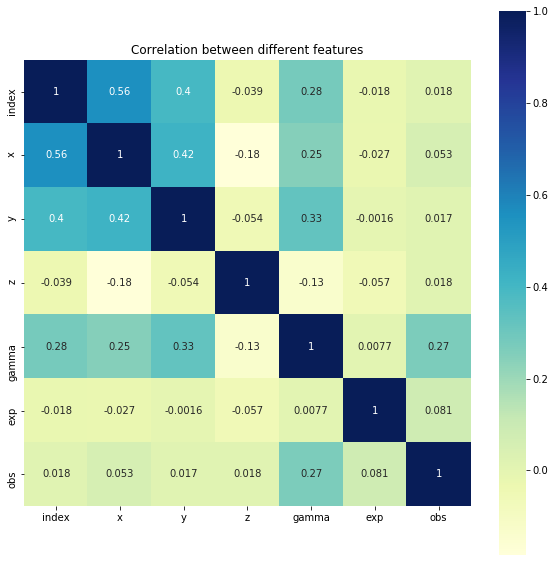

In [6]:
# Visualising correlation using Seaborn library 
correlation = data.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'YlGnBu')
plt.title('Correlation between different features')

In [7]:
expected_mutations = data['exp']
expected_mutations.head()

0    0.551831
1    0.548329
2    0.621959
3    0.579143
4    0.575410
Name: exp, dtype: float64

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Spatial Distribution of Protein</font></center>
-------------------------------------------------------------------------------------------------------------------------------

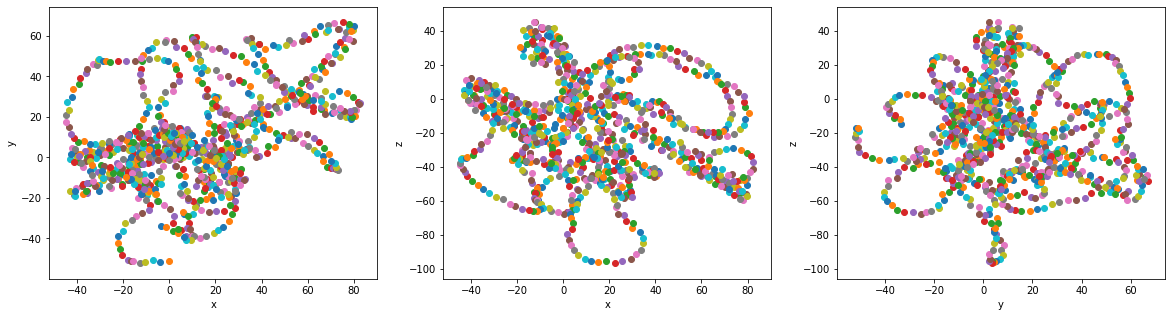

In [8]:
# Spatial distribution of amino acids in the first protein dataset
M = 8000
fig, ax = plt.subplots(1, 3, figsize = (20, 5))

colors = ["darkred", "dodgerblue", "mediumseagreen", "gold", "purple"]
index = data.index.unique()

for n in range(len(index)):
    
    # x-y plot
    ax[0].scatter(data.loc[data.index == index[n]].x.values[0:M], 
                 data.loc[data.index == index[n]].y.values[0:M])
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("y")
    
    # x-z plot
    ax[1].scatter(data.loc[data.index == index[n]].x.values[0:M], 
                 data.loc[data.index == index[n]].z.values[0:M])
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("z")
    
    # y-z plot
    ax[2].scatter(data.loc[data.index == index[n]].y.values[0:M], 
                 data.loc[data.index == index[n]].z.values[0:M])
    ax[2].set_xlabel("y")
    ax[2].set_ylabel("z")

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Histograms</font></center>
-------------------------------------------------------------------------------------------------------------------------------

Text(0, 0.5, 'count')

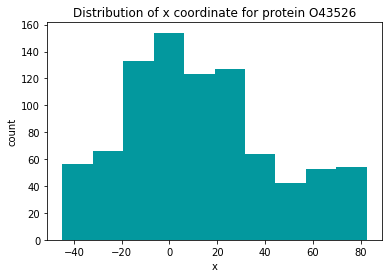

In [9]:
plt.hist(data['x'], color = "#03989e")
plt.title("Distribution of x coordinate for protein O43526")
plt.xlabel('x')
plt.ylabel('count')

Text(0, 0.5, 'count')

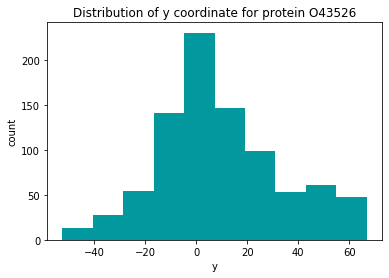

In [10]:
plt.hist(data['y'], color = "#03989e")
plt.title("Distribution of y coordinate for protein O43526")
plt.xlabel('y')
plt.ylabel('count')

Text(0, 0.5, 'count')

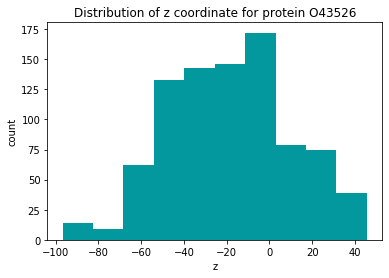

In [11]:
plt.hist(data['z'], color = "#03989e")
plt.title("Distribution of z coordinate for protein O43526")
plt.xlabel('z')
plt.ylabel('count')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>3D Plots of all 10 proteins</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [12]:
sns.set()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [13]:
protein1 = pd.read_csv('AF-O43526-F1-model_v3.csv')
protein2 = pd.read_csv('AF-P01009-F1-model_v3.csv')
protein3 = pd.read_csv('AF-P06576-F1-model_v3.csv')
protein4 = pd.read_csv('AF-P17181-F1-model_v3.csv')
protein5 = pd.read_csv('AF-P60484-F1-model_v3.csv')
protein6 = pd.read_csv('AF-P68133-F1-model_v3.csv')
protein7 = pd.read_csv('AF-P69905-F1-model_v3.csv')
protein8 = pd.read_csv('AF-Q5S007-F1-model_v3.csv')
protein9 = pd.read_csv('AF-Q86VV8-F1-model_v3.csv')
protein10 = pd.read_csv('AF-Q969H0-F1-model_v3.csv')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein O43526</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [14]:
N = 100000

trace1 = go.Scatter3d(x = protein1.x.values[0:N], 
                     y = protein1.y.values[0:N], 
                     z = protein1.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein1.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein P01009</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [15]:
N = 100000

trace1 = go.Scatter3d(x = protein2.x.values[0:N], 
                     y = protein2.y.values[0:N], 
                     z = protein2.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein2.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein P06576</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [16]:
N = 100000

trace1 = go.Scatter3d(x = protein3.x.values[0:N], 
                     y = protein3.y.values[0:N], 
                     z = protein3.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein3.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein P17181</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [17]:
N = 100000

trace1 = go.Scatter3d(x = protein4.x.values[0:N], 
                     y = protein4.y.values[0:N], 
                     z = protein4.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein4.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein P60484</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [18]:
N = 100000

trace1 = go.Scatter3d(x = protein5.x.values[0:N], 
                     y = protein5.y.values[0:N], 
                     z = protein5.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein5.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein P68133</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [19]:
N = 100000

trace1 = go.Scatter3d(x = protein6.x.values[0:N], 
                     y = protein6.y.values[0:N], 
                     z = protein6.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein6.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein P69905</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [20]:
N = 100000

trace1 = go.Scatter3d(x = protein7.x.values[0:N], 
                     y = protein7.y.values[0:N], 
                     z = protein7.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein7.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein Q5S007</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [21]:
N = 100000

trace1 = go.Scatter3d(x = protein8.x.values[0:N], 
                     y = protein8.y.values[0:N], 
                     z = protein8.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein8.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein Q86VV8</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [22]:
N = 100000

trace1 = go.Scatter3d(x = protein9.x.values[0:N], 
                     y = protein9.y.values[0:N], 
                     z = protein9.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein9.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>Protein Q969H0</font></center>
-------------------------------------------------------------------------------------------------------------------------------

In [23]:
N = 100000

trace1 = go.Scatter3d(x = protein10.x.values[0:N], 
                     y = protein10.y.values[0:N], 
                     z = protein10.z.values[0:N], 
                     mode = 'markers', 
                     marker = dict(
                         color = protein10.index.values[0:N], 
                         colorscale = "emrld", 
                         opacity = 1, size = 5
                     ))
figure_data = [trace1]
layout = go.Layout(title = 'Coloring by index', 
                   scene = dict(
                   xaxis = dict(title = "x"), 
                   yaxis = dict(title = "y"), 
                   zaxis = dict(title = "z")), 
                   margin = dict(
                   l = 0, r = 0, b = 0, t = 0),
                   showlegend = True
)

fig = go.Figure(data = figure_data, layout = layout)
py.iplot(fig, filename = 'simple-3d-scatter')

-------------------------------------------------------------------------------------------------------------------------------
#### <center><font color = #03989e>End of Notebook</font></center>
-------------------------------------------------------------------------------------------------------------------------------